In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Projects/Product_ID.csv')

In [ ]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7360,30-04-2018 11:16,21.0,E-mail Campaign,NaN,iXXXXXXXotmail.com,Sales-Agent-4,Other Locations,Mode-1,CONVERTED
7361,30-04-2018 11:13,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,Junk Lead
7362,30-04-2018 11:13,18.0,Call,NaN,#VALUE!,Sales-Agent-9,Bangalore,Mode-5,Long Term
7363,30-04-2018 11:13,21.0,Campaign,NaN,CXXXXXXXa-tech.com,Sales-Agent-4,Bangalore,Mode-1,Not Responding


In [ ]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7365 entries, 0 to 7364
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7365 non-null   object 
 1   Product_ID     7307 non-null   float64
 2   Source         7348 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7365 non-null   object 
 5   Sales_Agent    7342 non-null   object 
 6   Location       7307 non-null   object 
 7   Delivery_Mode  7365 non-null   object 
 8   Status         7365 non-null   object 
dtypes: float64(1), object(8)
memory usage: 518.0+ KB


In [ ]:
data.describe()

,Product_ID
count,7307.000000
mean,15.938142
std,6.077585
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [ ]:
data.describe(include=object).T

,count,unique,top,freq
Created,7365,6699,10-05-2018 12:30,4
Source,7348,25,Call,2530
Mobile,5612,486,XXXXXXX,222
EMAIL,7365,880,#VALUE!,1691
Sales_Agent,7342,12,Sales-Agent-4,1492
Location,7307,17,Other Locations,2485
Delivery_Mode,7365,5,Mode-5,2968
Status,7365,11,Junk Lead,1527


In [ ]:
# Cleaning the data:
data.isnull().sum()

,0
Created,0
Product_ID,58
Source,17
Mobile,1753
EMAIL,0
Sales_Agent,23
Location,58
Delivery_Mode,0
Status,0


In [ ]:
# Percentage of missing values:
round((data.isnull().sum()/len(data.index)*100),2)

,0
Created,0.00
Product_ID,0.79
Source,0.23
Mobile,23.80
EMAIL,0.00
Sales_Agent,0.31
Location,0.79
Delivery_Mode,0.00
Status,0.00


**Inputting the null values**

In [ ]:
data['Source'].mode()

,Source
0,Call


In [ ]:
data.loc[data['Source'].isnull(),'Source']="Call"

In [ ]:
data.Source.isnull().sum()

0

In [ ]:
data["Product_ID"].mean()

15.938141508142877

In [ ]:
data["Product_ID"].median()

18.0

In [ ]:
data["Product_ID"].value_counts()

,count
Product_ID,
18.0,1697
15.0,1507
19.0,1182
9.0,987
27.0,735
5.0,484
10.0,166
1.0,105
20.0,100


In [ ]:
# Imputation on Product_ID:
data.loc[data['Product_ID'].isnull(),'Product_ID']=1.0

In [ ]:
data.Product_ID.isnull().sum()

0

<Axes: xlabel='Product_ID', ylabel='Density'>

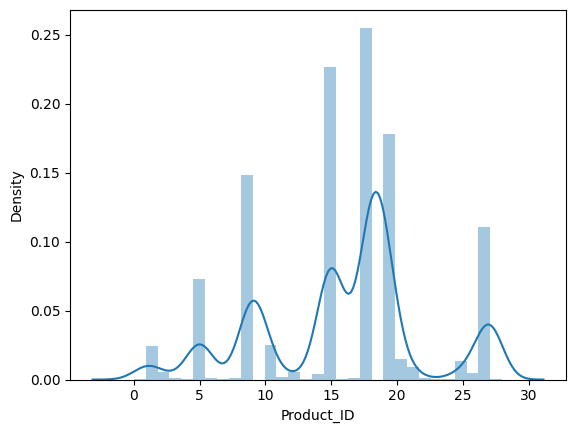

In [ ]:
# Distribution of Product_ID:
sns.distplot(data["Product_ID"])


Visualizing the outliers :
Handling the outliers :
Using Winsorize Method to handle outliers:

In [ ]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

<Axes: xlabel='Created'>

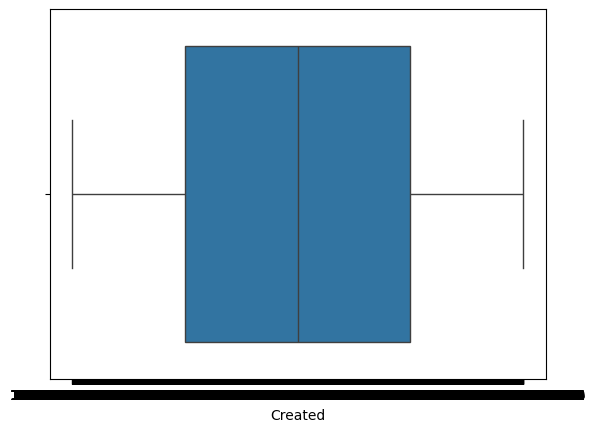

In [ ]:
sns.boxplot(x=data.Created,orient='h')

In [ ]:
from scipy.stats.mstats import winsorize

# Specify the percentage of data to be trimmed from both ends
trim_percentage = 0.05

# Winsorize the specified column
data['Created'] = winsorize(data['Created'], limits=trim_percentage)

<Axes: xlabel='Created'>

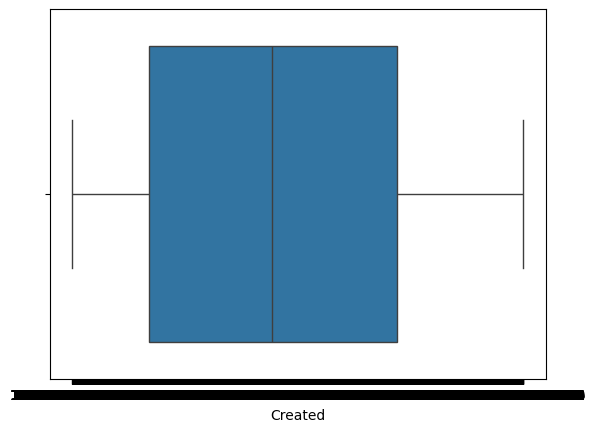

In [ ]:
sns.boxplot(x=data.Created ,orient='h')


**Using IQR method to handle the outliers**

<Axes: xlabel='Mobile'>

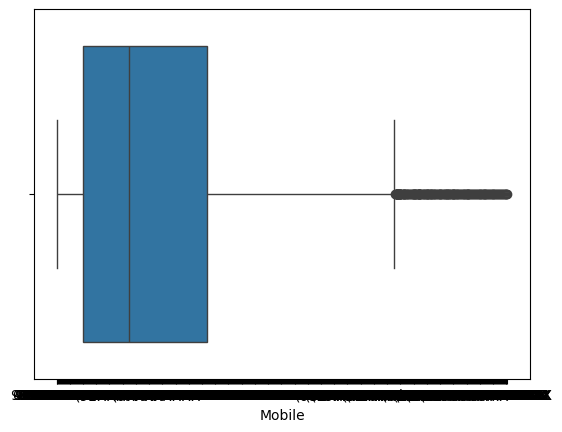

In [ ]:
sns.boxplot(x=data.Mobile,orient='v')

In [ ]:
# Calculate quartiles
Q1 = data['Product_ID'].quantile(0.25)
Q3 = data['Product_ID'].quantile(0.75)
print(Q1)
print(Q3)

10.0
19.0


In [ ]:
# Calculate IQR
IQR = Q3 - Q1
IQR

9.0

In [ ]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-3.5
32.5


In [ ]:
# Remove outliers
data = data[(data['Product_ID'] >= lower_bound) & (data['Product_ID'] <= upper_bound)]

<Axes: xlabel='Product_ID'>

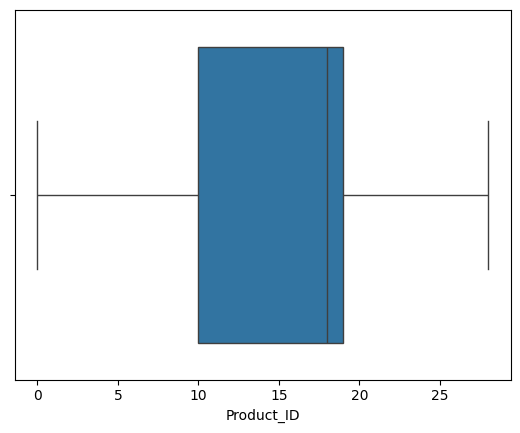

In [ ]:
sns.boxplot(x=data.Product_ID ,orient='h')

# **Data  Preproscessing**

In [ ]:
data.Created.value_counts()

,count
Created,
02-07-2018 20:15,369
30-05-2018 17:05,369
27-09-2018 11:00,4
14-09-2018 12:00,4
26-09-2018 11:30,4
...,...
29-08-2018 16:30,1
29-08-2018 16:36,1
29-08-2018 16:45,1


In [ ]:
data.Created.unique()

array(['14-11-2018 10:05', '14-11-2018 09:22', '14-11-2018 09:21', ...,
       '30-04-2018 11:16', '30-04-2018 11:13', '30-04-2018 11:12'],
      dtype=object)

In [ ]:
data.Product_ID.value_counts()

,count
Product_ID,
18.0,1697
15.0,1507
19.0,1182
9.0,987
27.0,735
5.0,484
10.0,166
1.0,163
20.0,100


# **Using One Hot Encoding**


In [ ]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [ ]:
data_Status=pd.get_dummies(data["Status"],drop_first=True,dtype=float)


In [ ]:
data.Status

,Status
0,Open
1,Open
2,Open
3,Open
4,Open
...,...
7360,CONVERTED
7361,Junk Lead
7362,Long Term
7363,Not Responding


# **Logarithmic Transformation**

### **Implementation**

In [ ]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

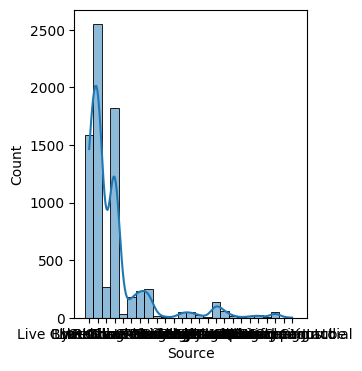

In [ ]:
plt.figure(figsize=(3,4))
sns.histplot(x=data['Source'], kde= True) # right screwed
plt.show()

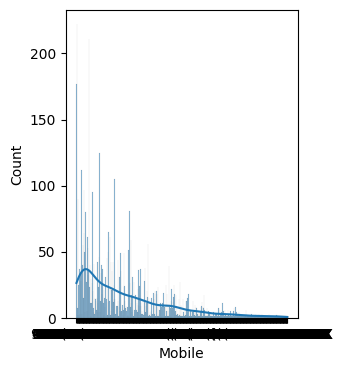

In [ ]:
plt.figure(figsize=(3,4))
sns.histplot(x=data['Mobile'], kde= True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
file_path = '/content/drive/MyDrive/Projects/Product_ID.csv'
data = pd.read_csv(file_path)


In [ ]:
print("Dataset Overview:")
print(data.head())



Dataset Overview:
            Created  Product_ID   Source      Mobile               EMAIL  \
0  14-11-2018 10:05         NaN  Website  984XXXXXXX  aXXXXXXX@gmail.com   
1  14-11-2018 09:22         NaN  Website     XXXXXXX             #VALUE!   
2  14-11-2018 09:21         NaN  Website     XXXXXXX  dXXXXXXX@yahoo.com   
3  14-11-2018 08:46         NaN  Website     XXXXXXX  wXXXXXXX@gmail.com   
4  14-11-2018 07:34         NaN  Website     XXXXXXX  cXXXXXXX@gmail.com   

      Sales_Agent Location Delivery_Mode Status  
0  Sales-Agent-11      NaN        Mode-5   Open  
1  Sales-Agent-10      NaN        Mode-5   Open  
2  Sales-Agent-10      NaN        Mode-5   Open  
3  Sales-Agent-10      NaN        Mode-5   Open  
4  Sales-Agent-10      NaN        Mode-5   Open  


In [ ]:

print("\nDataset Info:")
print(data.info())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7365 entries, 0 to 7364
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7365 non-null   object 
 1   Product_ID     7307 non-null   float64
 2   Source         7348 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7365 non-null   object 
 5   Sales_Agent    7342 non-null   object 
 6   Location       7307 non-null   object 
 7   Delivery_Mode  7365 non-null   object 
 8   Status         7365 non-null   object 
dtypes: float64(1), object(8)
memory usage: 518.0+ KB
None


In [ ]:

print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Created             0
Product_ID         58
Source             17
Mobile           1753
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64


# **Data visualization for insights**
# Example: Distribution of Product_ID


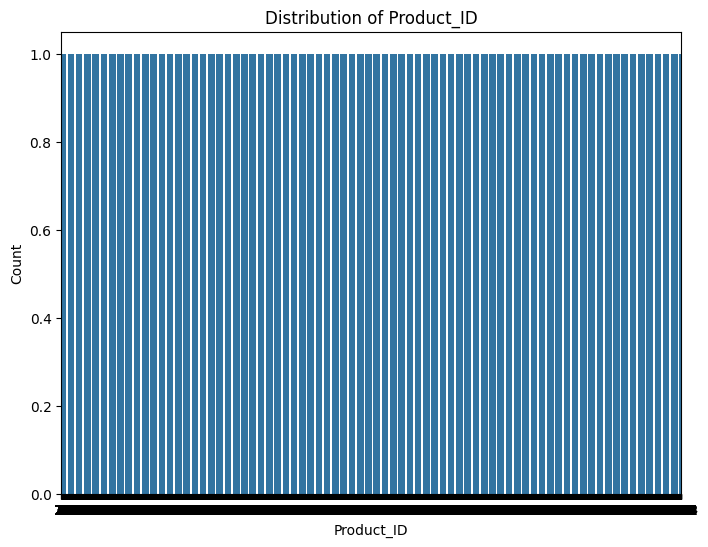

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data['Product_ID'])
plt.title('Distribution of Product_ID')
plt.xlabel('Product_ID')
plt.ylabel('Count')
plt.show()

**Correlation matrix**

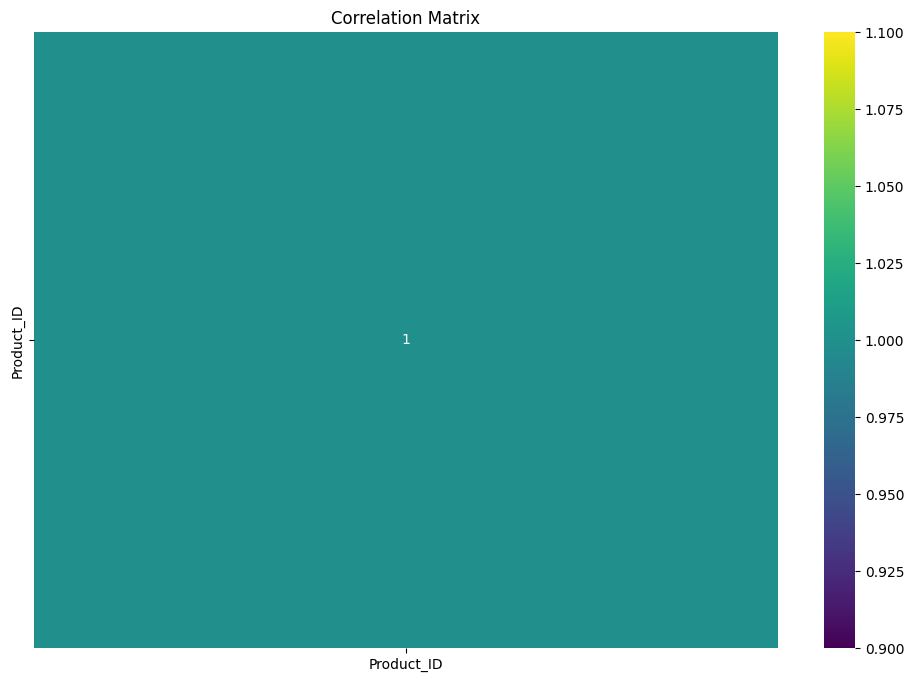

In [ ]:
# Convert 'Created' column to datetime objects
data['Created'] = pd.to_datetime(data['Created'])

# Extract numerical features for correlation
numerical_data = data.select_dtypes(include=np.number)

# Calculate correlation matrix using numerical data
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis')  # Or any other valid cmap
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Handle missing values for numerical columns only

numerical_columns = data.select_dtypes(include=np.number).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

In [ ]:
# Handle missing values for numerical columns only

numerical_columns = data.select_dtypes(include=np.number).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Handle missing values for categorical columns using mode
categorical_columns = data.select_dtypes(exclude=np.number).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [ ]:
# Convert categorical columns to numerical using Label Encoding
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


# **Feature selection**

In [ ]:
X = data.drop(columns=['Product_ID'])  # Features
y = data['Product_ID']  # Target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Convert 'Created' column to numerical representation (e.g., Unix timestamp)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
#... (Your existing code for data loading, preprocessing, etc.) ...

# Convert 'Created' to Unix timestamp (seconds since epoch)
# This represents the datetime as a single numerical value.
data['Created'] = pd.to_datetime(data['Created']).astype(np.int64) // 10**9

#Feature selection
X = data.drop(columns=['Product_ID'])  # Features
y = data['Product_ID']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Build an ML model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Evaluate the model

y_pred = model.predict(X_test)


In [ ]:
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Evaluation:
Accuracy: 0.4467073998642227
Confusion Matrix:
[[  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   2   0  10   1   0   1
    0   0   0   0   0   1]
 [  0   0   0   0   0   0   3   0   0   0   0   0   0   0   1   1   0   0
    0   0   0   0   0   0]
 [  0   1   0  11   0   0   9   1   0   0   0   0   5   0  50  11   0   0
    0   0   0   0   0  13]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   2   0   0  57   0   0   0   0   1   9   0  77  34   0   0
    0   0   0   0   0  20]
 [  0   0   0   2   0   0  10   2   0   0   0   0   2   0  14   5   0   0
    0   0   0   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0

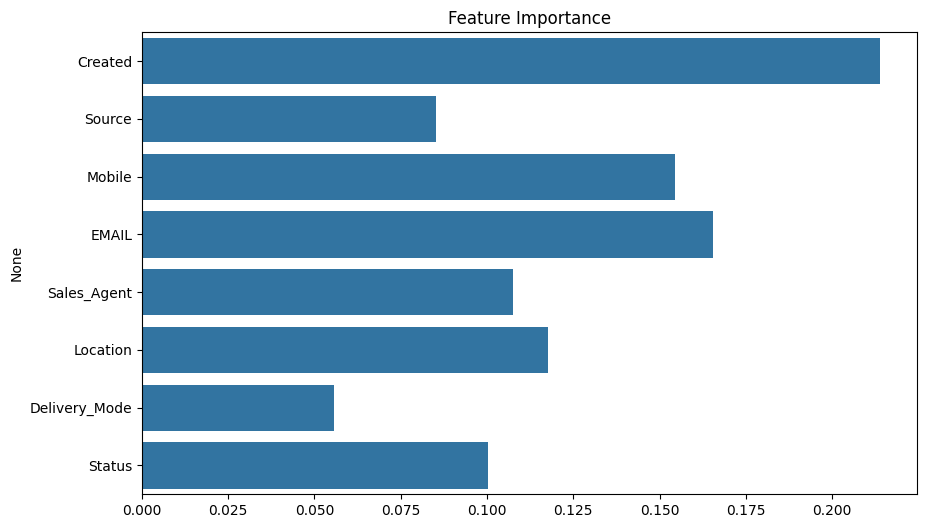

In [ ]:
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance')
plt.show()


## **Linear Logistic Regression**

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
file_path = "Product_ID.csv"
data = pd.read_csv('/content/drive/MyDrive/Projects/Product_ID.csv')

In [ ]:
# Exploring the dataset

print(data.head())
print(data.info())

            Created  Product_ID   Source      Mobile               EMAIL  \
0  14-11-2018 10:05         NaN  Website  984XXXXXXX  aXXXXXXX@gmail.com   
1  14-11-2018 09:22         NaN  Website     XXXXXXX             #VALUE!   
2  14-11-2018 09:21         NaN  Website     XXXXXXX  dXXXXXXX@yahoo.com   
3  14-11-2018 08:46         NaN  Website     XXXXXXX  wXXXXXXX@gmail.com   
4  14-11-2018 07:34         NaN  Website     XXXXXXX  cXXXXXXX@gmail.com   

      Sales_Agent Location Delivery_Mode Status  
0  Sales-Agent-11      NaN        Mode-5   Open  
1  Sales-Agent-10      NaN        Mode-5   Open  
2  Sales-Agent-10      NaN        Mode-5   Open  
3  Sales-Agent-10      NaN        Mode-5   Open  
4  Sales-Agent-10      NaN        Mode-5   Open  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7365 entries, 0 to 7364
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7365 non-null   object 
 1   

In [ ]:
# Clean the data by dropping rows with missing values
data_cleaned = data.dropna()

In [ ]:
# Define features (X) and target (y)
X = data_cleaned.drop(columns=["Status"])  # Replace with all non-target columns
y = data_cleaned["Status"]

In [ ]:
# Convert categorical data to numeric if applicable
X = pd.get_dummies(X, drop_first=True)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.3108433734939759

Classification Report:
                       precision    recall  f1-score   support

           CONVERTED       0.33      0.33      0.33       158
In Progress Negative       0.19      0.14      0.16       100
In Progress Positive       0.37      0.56      0.45       180
           Junk Lead       0.35      0.49      0.41       344
        Just Enquiry       0.17      0.11      0.14       203
                LOST       0.17      0.05      0.07        63
           Long Term       0.27      0.14      0.18       136
      Not Responding       0.30      0.30      0.30       264
                Open       0.00      0.00      0.00         8
           Potential       0.30      0.30      0.30       199
           converted       0.00      0.00      0.00         5

            accuracy                           0.31      1660
           macro avg       0.22      0.22      0.21      1660
        weighted avg       0.29      0.31      0.29      1660


Confusion Ma

# **Decision Tree**

In [ ]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree

In [ ]:
X = data[['Source', 'Sales_Agent', 'Location', 'Delivery_Mode']]  # Features
y = data['Status']  # Target variable

In [ ]:
# Encoding categorical variables
X = pd.get_dummies(X)

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initializing the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
# Training the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Making predictions
y_pred = dt_model.predict(X_test)

In [ ]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.2892057026476578
Classification Report:
                       precision    recall  f1-score   support

           CONVERTED       0.32      0.34      0.33       163
In Progress Negative       0.16      0.11      0.13       132
In Progress Positive       0.33      0.47      0.39       132
           Junk Lead       0.34      0.57      0.42       300
        Just Enquiry       0.19      0.16      0.17       146
                LOST       0.24      0.12      0.16        74
           Long Term       0.13      0.07      0.09       127
      Not Responding       0.31      0.21      0.25       221
                Open       0.91      0.77      0.83        13
           Potential       0.20      0.15      0.17       162
           converted       0.00      0.00      0.00         3

            accuracy                           0.29      1473
           macro avg       0.29      0.27      0.27      1473
        weighted avg       0.27      0.29      0.27      1473



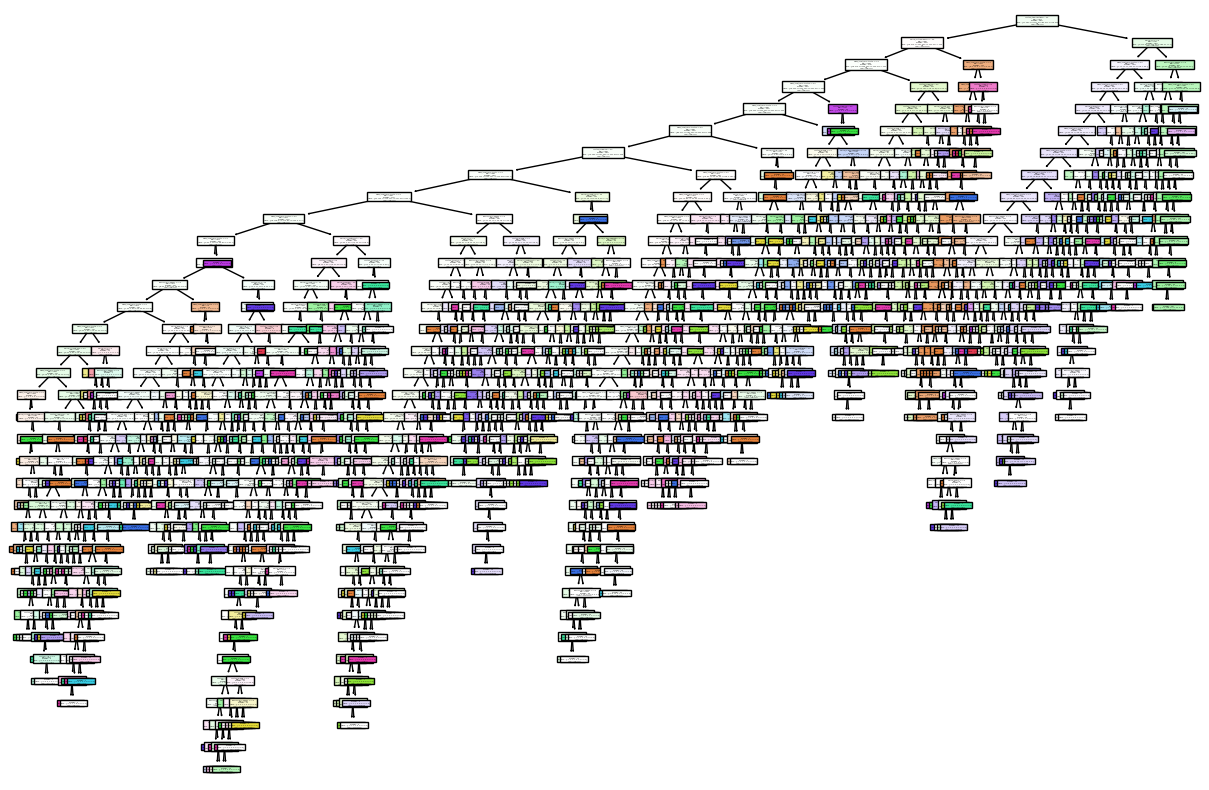

In [ ]:
# Visualizing the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True)
plt.show()

### Gradient Boosting (e.g., XGBoost, LightGBM)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Projects/Product_ID.csv')  # Replace with the correct file path

In [ ]:
# Preprocess data: handle missing values (drop for simplicity here)
data = data.dropna()


In [ ]:
# Encode categorical columns
categorical_columns = ['Created', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location', 'Delivery_Mode']  # Replace with your actual categorical columns
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [ ]:
# Define features and target
X = data.drop('Status', axis=1)  # Replace 'Status' with the target column
y = data['Status']

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
!pip install scikit-learn==1.1.3 xgboost

In [ ]:
# Define and train the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=len(label_encoder.classes_),  # Number of unique classes
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=11,
              num_parallel_tree=None, ...)

In [ ]:
# Make predictions
xgb_preds = xgb_model.predict(X_test)

In [ ]:
# Decode predictions back to original labels
xgb_preds_decoded = label_encoder.inverse_transform(xgb_preds)

In [ ]:
# Evaluation
print("XGBoost Accuracy:", accuracy_score(label_encoder.inverse_transform(y_test), xgb_preds_decoded))
print("Classification Report:\n", classification_report(label_encoder.inverse_transform(y_test), xgb_preds_decoded))

XGBoost Accuracy: 0.32339656729900634
Classification Report:
                       precision    recall  f1-score   support

           CONVERTED       0.31      0.30      0.30       105
In Progress Negative       0.22      0.19      0.20        59
In Progress Positive       0.34      0.52      0.41       116
           Junk Lead       0.40      0.49      0.44       237
        Just Enquiry       0.21      0.18      0.19       122
                LOST       0.23      0.07      0.10        46
           Long Term       0.22      0.15      0.17        96
      Not Responding       0.36      0.35      0.36       182
                Open       1.00      0.33      0.50         6
           Potential       0.28      0.26      0.27       136
           converted       0.33      0.50      0.40         2

            accuracy                           0.32      1107
           macro avg       0.35      0.30      0.30      1107
        weighted avg       0.31      0.32      0.31      1107



#  Support Vector Machines (SVM)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Projects/Product_ID.csv')
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7360,30-04-2018 11:16,21.0,E-mail Campaign,NaN,iXXXXXXXotmail.com,Sales-Agent-4,Other Locations,Mode-1,CONVERTED
7361,30-04-2018 11:13,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,Junk Lead
7362,30-04-2018 11:13,18.0,Call,NaN,#VALUE!,Sales-Agent-9,Bangalore,Mode-5,Long Term
7363,30-04-2018 11:13,21.0,Campaign,NaN,CXXXXXXXa-tech.com,Sales-Agent-4,Bangalore,Mode-1,Not Responding


In [ ]:
# Handle missing data (optional: modify as per dataset)
data = data.dropna()

In [ ]:
# Define features (X) and target (y)
X = data.drop(columns=['Status'])
y = data['Status']

In [ ]:
# Convert 'Created' column to datetime objects
X['Created'] = pd.to_datetime(X['Created'])

# Extract numerical features for imputation
numerical_features = X.select_dtypes(include=np.number).columns

# Fill missing values in numerical features with their means
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())



In [ ]:
# Scale the features (SVMs are sensitive to feature scaling)
# Select only numerical features for scaling
numerical_features = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_scaled = X.copy()  # Create a copy to avoid modifying the original DataFrame
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Convert 'Created' column to numerical (e.g., Unix timestamp) before applying OneHotEncoder
X['Created'] = pd.to_datetime(X['Created']).astype(np.int64) // 10**9

# Apply one-hot encoding
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as is
)

X_encoded = column_transformer.fit_transform(X)

# Re-split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Re-train the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)
y_probs = svm_model.predict_proba(X_test)[:, 1]



In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test)
y_probs = svm_model.predict_proba(X_test)  # Remove [:, 1] to get probabilities for all classes

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs, multi_class='ovr'))  # Calculate ROC-AUC for multi-class

Classification Report:
                      precision    recall  f1-score   support

           CONVERTED       0.31      0.32      0.32       111
In Progress Negative       0.00      0.00      0.00        77
In Progress Positive       0.34      0.35      0.34       115
           Junk Lead       0.28      0.81      0.42       226
        Just Enquiry       0.00      0.00      0.00       134
                LOST       0.00      0.00      0.00        45
           Long Term       0.00      0.00      0.00        87
      Not Responding       0.25      0.12      0.17       177
                Open       0.00      0.00      0.00         3
           Potential       0.23      0.24      0.24       129
           converted       0.00      0.00      0.00         3

            accuracy                           0.28      1107
           macro avg       0.13      0.17      0.13      1107
        weighted avg       0.19      0.28      0.21      1107

Accuracy: 0.2809394760614273
ROC-AUC Score: 

### **Plotting SVM Decision Boundary**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
# Generate a sample 2D dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma=0.5, probability=True)
svm_model.fit(X_scaled, y)


SVC(C=1, gamma=0.5, probability=True)

In [ ]:
# Create a mesh grid for plotting
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [ ]:
# Predict over the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

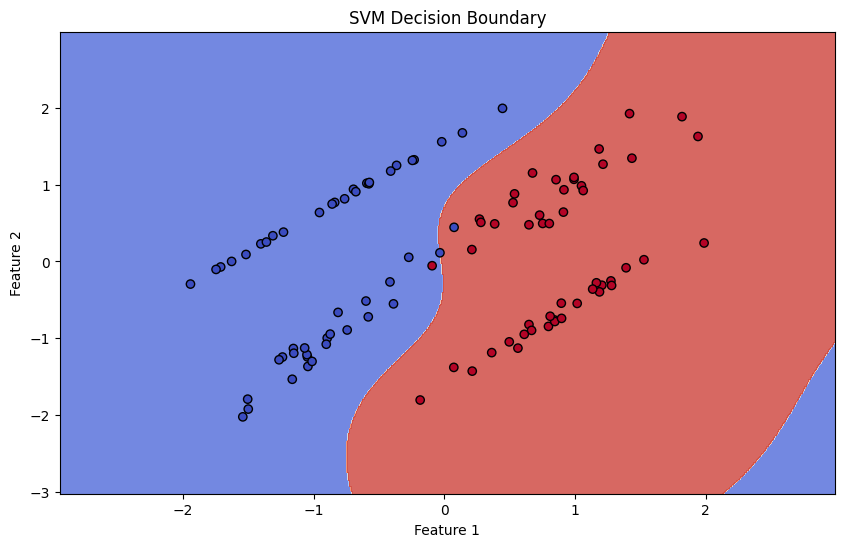

In [ ]:
# Plot decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# **Model Evaluation and Comparison**

In [ ]:
for model_name, model in [('Random Forest', rf_model),
                          ('Logistic Regression', lr_model),
                          ('Decision Tree', dt_model),
                          ('XGBoost', xgb_model),
                          ('SVM', svm_model)]:
    if not hasattr(model, 'classes_'):
        print(f"Error: {model_name} has not been fitted.")


Error: SVM has not been fitted.


In [ ]:
# Train the SVM model
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Check the mapping of labels
print("Label Mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


Label Mapping: {'CONVERTED': 0, 'In Progress Negative': 1, 'In Progress Positive': 2, 'Junk Lead': 3, 'Just Enquiry': 4, 'LOST': 5, 'Long Term': 6, 'Not Responding': 7, 'Open': 8, 'Potential': 9, 'converted': 10}


In [ ]:
xgb_model.fit(X_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=11,
              num_parallel_tree=None, ...)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train models
rf_model.fit(X_train, y_train_encoded)
lr_model.fit(X_train, y_train_encoded)
dt_model.fit(X_train, y_train_encoded)
xgb_model.fit(X_train, y_train_encoded)
svm_model.fit(X_train, y_train_encoded)

# Evaluate models
for model_name, model in [('Random Forest', rf_model),
                          ('Logistic Regression', lr_model),
                          ('Decision Tree', dt_model),
                          ('XGBoost', xgb_model),
                          ('SVM', svm_model)]:
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    print(f"Model: {model_name}")
    print("Classification Report:\n", classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

    if y_probs is not None:
        auc_score = roc_auc_score(y_test_encoded, y_probs, multi_class='ovr')
        print("ROC-AUC Score (Multi-Class OVR):", auc_score)

    print("\n")


Model: Random Forest
Classification Report:
                       precision    recall  f1-score   support

           CONVERTED       0.39      0.42      0.41       111
In Progress Negative       0.21      0.09      0.13        77
In Progress Positive       0.30      0.46      0.36       115
           Junk Lead       0.33      0.43      0.37       226
        Just Enquiry       0.28      0.28      0.28       134
                LOST       0.08      0.02      0.03        45
           Long Term       0.22      0.11      0.15        87
      Not Responding       0.31      0.27      0.29       177
                Open       0.50      0.67      0.57         3
           Potential       0.25      0.25      0.25       129
           converted       1.00      0.33      0.50         3

            accuracy                           0.30      1107
           macro avg       0.35      0.30      0.30      1107
        weighted avg       0.29      0.30      0.29      1107

ROC-AUC Score (Multi-C